In [1]:
import json
import os
import pandas as pd
import numpy as np
path = os.getcwd()
from classes.Block import Block #the block class
from classes.Attribute import Attribute #the block class
import networkx as nx
import itertools
from collections import Counter, OrderedDict, defaultdict
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kalevkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#TODO (put done if it is done)

#variables to create:
#all tokens of e1: val_e1_tokens ([str]) DONE
#all tokens of e1: val_e2_tokens [str] DONE
#Tokens in each entityProfile of E1 ({ "eP": ['token1', 'token2',...'tokenN']}): dict_E1 DONE
#Tokens in each entityProfile of E2 ({ "eP": ['token1', 'token2',...'tokenN']}): dict_E2 DONE
#sets of token set(tokenE1 + tokenE2): commonToken DONE
#Entities of E1 that contains a ct ∈ commonToken { "cT": [1,2,3,10,....]}: e1_dict_token DONE
#Entities of E2 that contains a ct ∈ commonToken { "cT": [101,102,103,110,....]}: e2_dict_token DONE
#Attributes of E1: all_att_e1 DONE
#Attributes of E2: all_att_e2 DONE


#make a class for the block: DONE
#create the class in a seperate python file/module (?) DONE
#Block needs a: name, ib1 (innerBlock1), ib2 (innerBlock2). if one of the ib ∈ IB is empty, a block
#of a token should not be created
#in addition, cardinality and block size


#stemming and cleaning:
#Do it at stem clean function
# remove stop words DONE
# stemming
# tokenize DONE
# DISCUSS: ignore numbers, so take only words as token, not integer
#AND LEMMATIZATION
#combine lowering all letters before making the token in one stem_clean function 
#so it will be easier to implement any semantic treatment
#delete period signs

#visualizatipo

In [3]:
# Opening JSON file
f1 = open(f'{path}/data/entityCol1.json')
f2 = open(f'{path}/data/entityCol2.json')
 
# returns JSON object as
# a dictionary
ec1 = json.load(f1)
ec2 = json.load(f2)

In [4]:
def stem_clean(arr):
    arr = [str(i) for i in arr]
    joint_words = ' '.join(arr)
    joint_words = str(joint_words).lower()
    val = word_tokenize(joint_words)
    valTok = list(set([w for w in val if not w.lower() in stop_words]))
    return valTok
    

In [5]:
#function to make attribute extraction, dictionary_token making, and unique token value
#still being experimented

def extract_unique_key_val(start_ind: int, ec ):
    all_att_e = []
    all_val_e = []
    dict_E = {}
    ep_ids = []
    x = start_ind
    for d in ec:
        values_EP = []
        for key, val in (d.items()):
            if(key != 'id'): #exclude id into the calculation. ID is just for marking
                all_att_e.append(key) #allKey
                treatedVal = str(val).lower()
                values_EP.append(treatedVal)
                all_val_e.append(treatedVal) #allVal - treat number as string
            else:
                
                ep_ids.append(str(val).lower())
            
        values_EP = stem_clean(values_EP)
        dict_E[x] = values_EP
        x = x+1
    
    att_e_keys = list(set(all_att_e))
    val_e_tokens = list(set(stem_clean(all_val_e)))
    
    
    return (att_e_keys, val_e_tokens, dict_E, ep_ids)
    
    
attE1Keys, val_e1_tokens, dict_E1, e1_ep_ids = extract_unique_key_val(1, ec1)
attE2Keys, val_e2_tokens, dict_E2, e2_ep_ids = extract_unique_key_val(101, ec2)
all_ids = e1_ep_ids + e2_ep_ids


<h3>Token Blocking </h3>

In [6]:
def token_blocking(val_e1_tokens, val_e2_tokens, dict_E1, dict_E2):
    #common token
    #Only take token that exists in both 
    
    common_token = set(val_e1_tokens) & set(val_e2_tokens)
    
    
    #from the common token create find all entity profile
    #that has contains the token
    e1_dict_token = {}
    
    for t in common_token:
        x = [ ep for ep in dict_E1 if t in dict_E1[ep]]
        e1_dict_token[t] = x
    

    e2_dict_token = {}
    for t in common_token:
        x = [ ep for ep in dict_E2 if t in dict_E2[ep]]
        e2_dict_token[t] = x
    
    all_blocks = []
    for ct in common_token:
        new_block = Block(ct,e1_dict_token[ct], e2_dict_token[ct] )
        all_blocks.append(new_block)

    all_blocks.sort(key=lambda x: x.b_cardinality, reverse=True) #sort based on its cardinality
    
    return all_blocks
    

In [7]:
token_blocks_all = token_blocking(val_e1_tokens, val_e2_tokens, dict_E1, dict_E2)

In [8]:
#DataFrame for Visualization Purpose
#each row represents one block
token_blocks_df = pd.DataFrame([x.as_dict() for x in token_blocks_all])
token_blocks_df.head(20)

,block_name,inner_b1,in_b1_size,inner_b2,in_b2_size,b_cardin,b_size
0,foundation,"[10, 13, 15, 16, 43, 57, 77, 80, 83]",9,"[106, 107, 125, 128, 141, 144, 152, 161, 170, ...",17,153,26
1,limited,"[11, 20, 25, 38, 42, 64, 68, 87, 92, 97]",10,"[111, 116, 117, 120, 164, 168, 199, 200]",8,80,18
2,institute,"[7, 12, 19, 29, 79, 82, 89]",7,"[104, 110, 127, 148, 159, 167, 171, 190, 194, ...",11,77,18
3,associates,"[21, 53, 56, 58, 59, 60, 69, 73]",8,"[112, 121, 132, 136, 146, 162, 163, 172]",8,64,16
4,llc,"[18, 47, 62, 72, 76, 81, 94]",7,"[109, 124, 126, 134, 150, 158, 169, 173, 174]",9,63,16
5,corporation,"[3, 9, 24, 26, 27, 36, 37, 39, 49, 63]",10,"[115, 131, 140, 181, 182, 191]",6,60,16
6,ut,"[10, 11, 13, 15, 16, 32, 46, 54, 62, 70, 88, 9...",13,"[106, 107, 151, 155]",4,52,17
7,incorporated,"[1, 6, 30, 46, 54, 84]",6,"[103, 129, 138, 145, 156, 187, 188, 189]",8,48,14
8,ltd,"[8, 35, 71, 74, 75, 88, 93, 96]",8,"[123, 149, 154, 155, 165, 180]",6,48,14
9,industries,"[5, 31, 45, 51, 52, 55, 78]",7,"[102, 130, 137, 143, 183, 193]",6,42,13


<h3>Attribute Clustering</h3>

In [9]:
#Group based on the attribute for E1
#Group based on the attribute for E2
"""attE1Keys.remove('id')
attE2Keys.remove('id')
attE2Keys.remove('age')"""

attribute_blocks_ec1 = {}
attribute_blocks_ec2 = {}

#get all values for the attributes
for attribute in attE1Keys:
    attribute_blocks_ec1[attribute]= stem_clean(list(set([att[attribute] for att in ec1 if attribute in att.keys()])))

for attribute in attE2Keys:
    attribute_blocks_ec2[attribute] = stem_clean(list(set([att[attribute] for att in ec2 if attribute in att.keys()])))

# Similarity Calculation

def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

sim_ec1_ec2 = {}
for each in attribute_blocks_ec1:
    dict_temp = {}
    for every in attribute_blocks_ec2:
        similarity = jaccard_set(attribute_blocks_ec1[each], attribute_blocks_ec2[every])
        if similarity > 0:
            dict_temp[every] = similarity
    if(bool(dict_temp)): #check if the dictionary is not empty
        max_key = max(dict_temp, key=dict_temp.get)
        sim_ec1_ec2[each] = max_key


sim_ec2_ec1 = {}
for each in attribute_blocks_ec2:
    dict_temp = {}
    for every in attribute_blocks_ec1:
        similarity = jaccard_set(attribute_blocks_ec2[each], attribute_blocks_ec1[every])
        if similarity > 0:
            dict_temp[every] = similarity
    if(bool(dict_temp)): #check if the dictionary is not empty
        max_key = max(dict_temp, key=dict_temp.get)
        sim_ec2_ec1[each] = max_key

#Attribute Blocking


# testa = jaccard_set(attribute_blocks_ec1['domicile'], attribute_blocks_ec2['country'])

In [10]:
sim_ec1_ec2

{'field': 'position',
 'domicile': 'country',
 'artist': 'artist',
 'city': 'location',
 'reportTo': 'manager',
 'country': 'country',
 'name': 'name',
 'gender': 'gender',
 'CEO': 'manager',
 'headQuarter': 'domicile',
 'author': 'author',
 'corporation': 'company',
 'location': 'domicile',
 'corpName': 'corporation',
 'work': 'employer',
 'company': 'company'}

In [11]:
sim_ec2_ec1

{'empName': 'name',
 'position': 'field',
 'domicile': 'country',
 'employer': 'work',
 'artist': 'artist',
 'country': 'country',
 'author': 'author',
 'name': 'name',
 'gender': 'gender',
 'corporation': 'corpName',
 'location': 'city',
 'company': 'company',
 'manager': 'CEO'}

<h3>Meta-blocking

In [12]:
# all_pairs = []
# for b in token_blocks_all:
#     ib1 = b.ib1
#     ib2 = b.ib2
#     b_pairs = list(itertools.product(ib1, ib2)) #all possible combinations of the two list
#     b_pairs = [list(p) for p in b_pairs]
#     for pair in b_pairs:
#         pair.sort()
#     all_pairs.append(b_pairs)
    
# all_pairs_flat = [item for sublist in all_pairs for item in sublist] #flatten it
# pairs_dict = Counter(map(tuple, all_pairs_flat))
# pairs_dict = OrderedDict(sorted(pairs_dict.items(), key=lambda x: x[1], reverse=True))
# pairs_dict

#count how many pairs pairs occurances in all_pairs_flat done
#[1,2] == [2,1] true , let's sort each pairs so the smaller one is first
#make a dictionary of pairs as key : num_of_occurances
#[1,2] : 3

    

<h4>Let's make two graphs that uses different edge weighting scheme </h4>
<ul>
    <li> Common block weighting scheme </li>
    <li> Jaccard </li>
</ul>

In [34]:
def create_graph(blocks, weighting_scheme):
    G = nx.Graph()
    if weighting_scheme == 1: #cb
        edges = weight_edge_cb(blocks)
    else:
        
#     if weighting_scheme == 2: #jc
        edges = weight_edge_jac(blocks)

    for nodes in edges:
        G.add_edge(nodes[0], nodes[1], weight=edges[nodes])
    
    return G, edges

def weight_edge_cb(token_blocks_all):
    all_pairs = []
    for b in token_blocks_all:
        ib1 = b.ib1
        ib2 = b.ib2
        b_pairs = list(itertools.product(ib1, ib2)) #all possible combinations of the two list
        b_pairs = [list(p) for p in b_pairs]
        for pair in b_pairs:
            pair.sort()
        all_pairs.append(b_pairs)

    all_pairs_flat = [item for sublist in all_pairs for item in sublist] #flatten it
    pairs_dict = Counter(map(tuple, all_pairs_flat))
    pairs_dict = OrderedDict(sorted(pairs_dict.items(), key=lambda x: x[1], reverse=True))
    return pairs_dict

def weight_edge_jac(token_blocks_all):
    
    all_inner_block = []
    for b in token_blocks_all:
        ib1 = b.ib1
        ib2 = b.ib2
        comb_inner_b = list(ib1 + ib2)
        all_inner_block.append(comb_inner_b)
        
    all_block_flat = [item for sublist in all_inner_block for item in sublist]
    count_ep = Counter(all_block_flat)
    
    all_pairs = []
    for b in token_blocks_all:
        ib1 = b.ib1
        ib2 = b.ib2
        b_pairs = list(itertools.product(ib1, ib2)) #all possible combinations of the two list
        b_pairs = [list(p) for p in b_pairs]
        for pair in b_pairs:
            pair.sort()
        all_pairs.append(b_pairs)

    all_pairs_flat = [item for sublist in all_pairs for item in sublist]
    pairs_dict = Counter(map(tuple, all_pairs_flat))
    pairs_dict = OrderedDict(sorted(pairs_dict.items(), key=lambda x: x[1], reverse=True))
    
    for p in pairs_dict:
        jac_weight = pairs_dict[p]/(count_ep[p[0]] + count_ep[p[1]] - pairs_dict[p])
        pairs_dict[p] = jac_weight
    
    return pairs_dict

<h4>Graph 1 before prunning with Weight Edge Prunning</h4>

average edge weight 1.2078947368421054
Before prunning num. of edges: 1140
Before prunning num. of nodes: 202


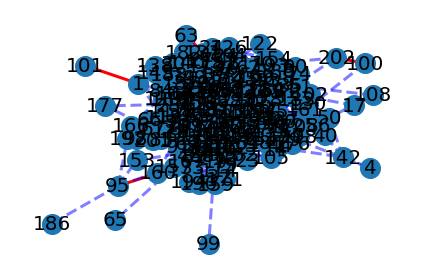

In [35]:
G1, g1_edges = create_graph(token_blocks_all, 1)

pos = nx.spring_layout(G1, seed=7)  # positions for all nodes - seed for reproducibility

#find average weight:
tot_weight = []
for w in g1_edges:
    tot_weight.append(g1_edges[w])
average_edge_weight = np.average(tot_weight)
print("average edge weight", average_edge_weight)

print("Before prunning num. of edges:", len(G1.edges()))
print("Before prunning num. of nodes:", len(G1.nodes()))

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=400)

elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] > average_edge_weight]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] <= average_edge_weight]

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge, width=3, edge_color="r")
nx.draw_networkx_edges(G1, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")

nx.draw_networkx_labels(G1, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

After prunning num. of edges: 107
After prunning num. of nodes: 124


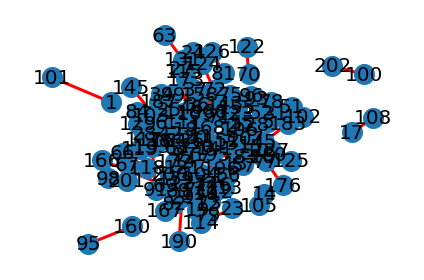

In [36]:
#remove edges that are below the treshold value (average weight)
removed_edges = [(a,b) for a, b, attrs in G1.edges(data=True) if attrs["weight"] <= average_edge_weight]
G1.remove_edges_from(removed_edges)

#remove isolated nodes
G1.remove_nodes_from(list(nx.isolates(G1)))


print("After prunning num. of edges:", len(G1.edges()))
print("After prunning num. of nodes:", len(G1.nodes()))

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=400)

elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] > average_edge_weight]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] <= average_edge_weight]

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge, width=3, edge_color="r")
nx.draw_networkx_edges(G1, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")

nx.draw_networkx_labels(G1, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


<h4>Graph 2 before prunning with Weight Edge Prunning

Before prunning num. of edges: 1140
Before prunning num. of nodes: 202
average edge weight 0.17093933600512548


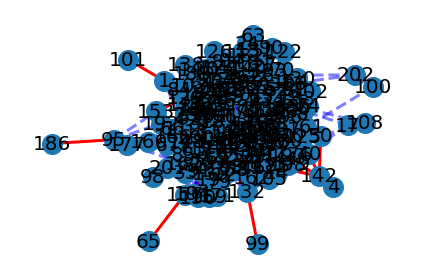

In [37]:
G2, g2_edges = create_graph(token_blocks_all, 2)

pos = nx.spring_layout(G2, seed=7)  # positions for all nodes - seed for reproducibility

print("Before prunning num. of edges:", len(G2.edges()))
print("Before prunning num. of nodes:", len(G2.nodes()))

#find average weight:
tot_weight = []
for w in g2_edges:
    tot_weight.append(g2_edges[w])
average_edge_weight = np.average(tot_weight)
print("average edge weight", average_edge_weight)

# nodes
nx.draw_networkx_nodes(G2, pos, node_size=400)

elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] > average_edge_weight]
esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] <= average_edge_weight]

# edges
# edges
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=3, edge_color="r")
nx.draw_networkx_edges(G2, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G2, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


After prunning num. of edges: 244
After prunning num. of edges: 186


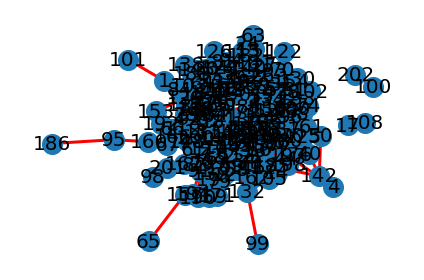

In [38]:
#remove edges that are below the treshold value (average weight)
removed_edges = [(a,b) for a, b, attrs in G2.edges(data=True) if attrs["weight"] <= average_edge_weight]
G2.remove_edges_from(removed_edges)

#remove isolated nodes
G2.remove_nodes_from(list(nx.isolates(G2)))


print("After prunning num. of edges:", len(G2.edges()))
print("After prunning num. of edges:", len(G2.nodes()))




# nodes
nx.draw_networkx_nodes(G2, pos, node_size=400)
elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] > average_edge_weight]
esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] <=average_edge_weight]

# edges
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=3, edge_color="r")
nx.draw_networkx_edges(G2, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_labels(G2, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

<h4>Prunning average method </h4>

In [39]:
token_jacc = {}
for each in attribute_blocks_ec1:
    dict_temp = {}
    for every in attribute_blocks_ec2:
        similarity = jaccard_set(attribute_blocks_ec1[each], attribute_blocks_ec2[every])
        if similarity > 0:
            dict_temp[every] = similarity
    if(bool(dict_temp)): #check if the dictionary is not empty
        max_key = max(dict_temp, key=dict_temp.get)
        sim_ec1_ec2[each] = max_key

In [40]:
all_inner_block = []
for b in token_blocks_all:
    ib1 = b.ib1
    ib2 = b.ib2
    comb_inner_b = list(ib1 + ib2)
    all_inner_block.append(comb_inner_b)
    
    
    
#     b_pairs = list(itertools.product(ib1, ib2)) #all possible combinations of the two list
#     b_pairs = [list(p) for p in b_pairs]
#     for pair in b_pairs:
#         pair.sort()
#     all_pairs.append(b_pairs)

In [41]:
len(all_inner_block[0])

26